### Logistic Regression Script

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   transaction_id        1000000 non-null  object 
 1   customer_id           1000000 non-null  object 
 2   timestamp             1000000 non-null  object 
 3   amount                1000000 non-null  float64
 4   channel               1000000 non-null  object 
 5   merchant_category     1000000 non-null  object 
 6   bank                  1000000 non-null  object 
 7   location              1000000 non-null  object 
 8   age_group             1000000 non-null  object 
 9   hour                  1000000 non-null  int64  
 10  day_of_week           1000000 non-null  int64  
 11  month                 1000000 non-null  int64  
 12  is_weekend            1000000 non-null  bool   
 13  is_peak_hour          1000000 non-null  bool   
 14  tx_count_24h          1000000 non-n

C:\Users\USER\AppData\Local\Temp\ipykernel_19644\2134498380.py:17: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


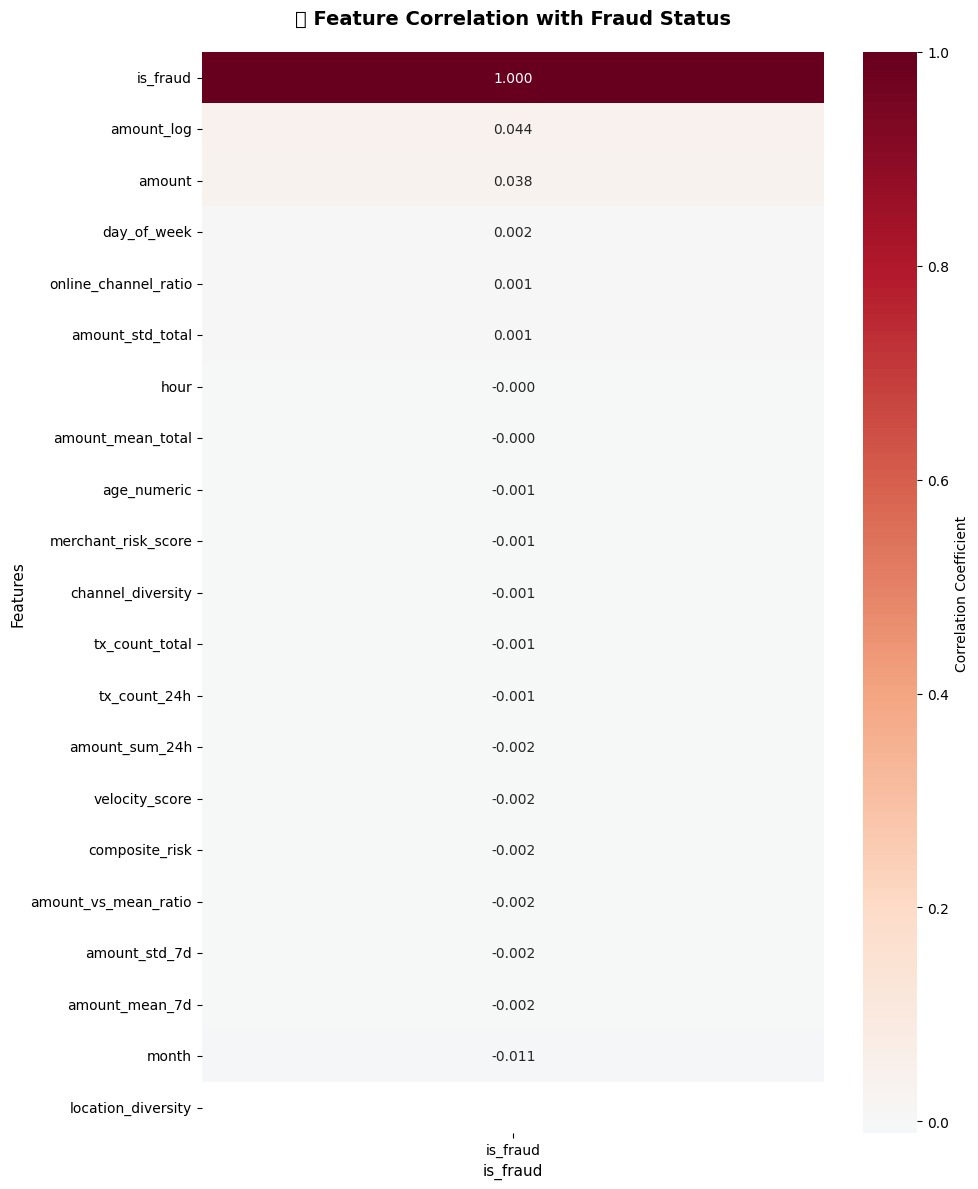


📊 TOP CORRELATIONS WITH FRAUD

🔴 POSITIVE CORRELATIONS (Higher values → More fraud):
is_fraud                1.000000
amount_log              0.044477
amount                  0.038324
day_of_week             0.001618
online_channel_ratio    0.001326
amount_std_total        0.000839

🟢 NEGATIVE CORRELATIONS (Higher values → Less fraud):
channel_diversity      -0.000788
tx_count_total         -0.001070
tx_count_24h           -0.001114
amount_sum_24h         -0.001903
velocity_score         -0.001939
composite_risk         -0.001940
amount_vs_mean_ratio   -0.002384
amount_std_7d          -0.002457
amount_mean_7d         -0.002478
month                  -0.011173



In [4]:
# Feature Correlation Analysis with Fraud
numeric_cols = df.select_dtypes(include=np.number).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 12))
sns.heatmap(
    corr[['is_fraud']].sort_values('is_fraud', ascending=False),
    annot=True,
    cmap='RdBu_r',
    center=0,
    fmt='.3f',
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('🔥 Feature Correlation with Fraud Status', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Features', fontsize=11)
plt.xlabel('is_fraud', fontsize=11)
plt.tight_layout()
plt.show()

# Print top correlations
print("\n" + "="*60)
print("📊 TOP CORRELATIONS WITH FRAUD")
print("="*60)
fraud_corr = corr['is_fraud'].sort_values(ascending=False)
print("\n🔴 POSITIVE CORRELATIONS (Higher values → More fraud):")
print(fraud_corr[fraud_corr > 0].head(10).to_string())
print("\n🟢 NEGATIVE CORRELATIONS (Higher values → Less fraud):")
print(fraud_corr[fraud_corr < 0].tail(10).to_string())
print("="*60 + "\n")


- Feature Engineering

📊 CHANNEL DISTRIBUTION ANALYSIS

          Count  Percentage  Fraud_Cases  Fraud_Rate_%
channel                                               
Mobile   449522       44.95         1496         0.333
Web      200488       20.05          687         0.343
POS      180035       18.00          551         0.306
IB        99653        9.97          168         0.169
ECOM      50227        5.02           76         0.151
ATM       20075        2.01           22         0.110

Total Unique Channels: 6
Most Common: Mobile (449,522 transactions, 45.0%)



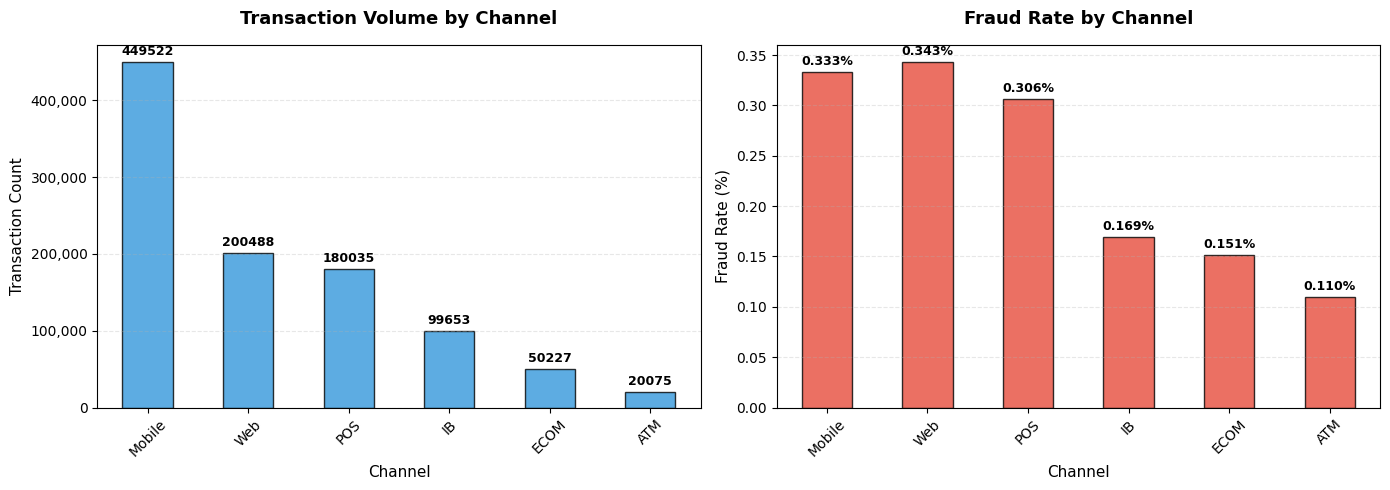

In [5]:
# Channel Distribution Analysis
print("="*70)
print("📊 CHANNEL DISTRIBUTION ANALYSIS")
print("="*70)

# Value counts with percentages
channel_dist = df['channel'].value_counts()
channel_pct = df['channel'].value_counts(normalize=True) * 100
channel_fraud = df.groupby('channel')['is_fraud'].agg(['sum', 'mean'])

# Combined table
channel_summary = pd.DataFrame({
    'Count': channel_dist,
    'Percentage': channel_pct.round(2),
    'Fraud_Cases': channel_fraud['sum'].astype(int),
    'Fraud_Rate_%': (channel_fraud['mean'] * 100).round(3)
}).sort_values('Count', ascending=False)

print("\n" + channel_summary.to_string())
print(f"\n{'='*70}")
print(f"Total Unique Channels: {df['channel'].nunique()}")
print(f"Most Common: {channel_dist.index[0]} ({channel_dist.iloc[0]:,} transactions, {channel_pct.iloc[0]:.1f}%)")
print(f"{'='*70}\n")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot: Transaction counts
channel_summary['Count'].plot(kind='bar', ax=ax1, color='#3498db', alpha=0.8, edgecolor='black')
ax1.set_title('Transaction Volume by Channel', fontsize=13, fontweight='bold', pad=15)
ax1.set_ylabel('Transaction Count', fontsize=11)
ax1.set_xlabel('Channel', fontsize=11)
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Bar plot: Fraud rates
channel_summary['Fraud_Rate_%'].plot(kind='bar', ax=ax2, color='#e74c3c', alpha=0.8, edgecolor='black')
ax2.set_title('Fraud Rate by Channel', fontsize=13, fontweight='bold', pad=15)
ax2.set_ylabel('Fraud Rate (%)', fontsize=11)
ax2.set_xlabel('Channel', fontsize=11)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for ax in [ax1, ax2]:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f' if ax == ax1 else '%.3f%%', padding=3, fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# E

-  Label Encoding for Channel (Keep as Categorical)

In [6]:
# Label Encoding for Channel (Keep as Categorical)
print("="*70)
print("🔄 LABEL ENCODING: CHANNEL COLUMN")
print("="*70)

# Store original shape
original_shape = df.shape
print(f"\n📊 BEFORE Encoding:")
print(f"   • Shape: {original_shape}")
print(f"   • Channel values: {df['channel'].unique().tolist()}")
print(f"   • Data type: {df['channel'].dtype}")

# Create mapping for label encoding (maintains order for interpretability)
channel_mapping = {
    'ATM': 0,
    'POS': 1,
    'Mobile': 2,
    'Web': 3,
    'IB': 4,
    'ECOM': 5
}

# Apply label encoding
df['channel_encoded'] = df['channel'].map(channel_mapping)

print(f"\n🎯 ENCODING MAPPING:")
for channel, code in sorted(channel_mapping.items(), key=lambda x: x[1]):
    count = (df['channel'] == channel).sum()
    print(f"   • {channel:8s} → {code} ({count:,} transactions)")

# Drop original channel column (keep only encoded version)
df = df.drop('channel', axis=1)

print(f"\n✅ AFTER Encoding:")
print(f"   • Shape: {df.shape}")
print(f"   • Original 'channel' column: REMOVED")
print(f"   • New 'channel_encoded' column: ADDED (int)")
print(f"   • Range: {df['channel_encoded'].min()} to {df['channel_encoded'].max()}")
print(f"   • Data type: {df['channel_encoded'].dtype}")

print(f"\n📋 Sample of encoded data:")
print(df[['channel_encoded']].head(10).to_string())

print(f"\n🔍 Verification - Value counts:")
print(df['channel_encoded'].value_counts().sort_index().to_string())

print(f"\n{'='*70}")
print(f"✅ Channel encoded as categorical (single numeric column)")
print(f"   • Benefit: Only 1 column instead of 6 (saves memory)")
print(f"   • Ready for: Logistic Regression, Tree models")
print(f"{'='*70}\n")

🔄 LABEL ENCODING: CHANNEL COLUMN

📊 BEFORE Encoding:
   • Shape: (1000000, 32)
   • Channel values: ['Mobile', 'Web', 'POS', 'IB', 'ECOM', 'ATM']
   • Data type: object

🎯 ENCODING MAPPING:
   • ATM      → 0 (20,075 transactions)
   • POS      → 1 (180,035 transactions)
   • Mobile   → 2 (449,522 transactions)
   • Web      → 3 (200,488 transactions)
   • IB       → 4 (99,653 transactions)
   • ECOM     → 5 (50,227 transactions)

✅ AFTER Encoding:
   • Shape: (1000000, 32)
   • Original 'channel' column: REMOVED
   • New 'channel_encoded' column: ADDED (int)
   • Range: 0 to 5
   • Data type: int64

📋 Sample of encoded data:
   channel_encoded
0                2
1                3
2                2
3                2
4                1
5                3
6                3
7                2
8                2
9                4

🔍 Verification - Value counts:
channel_encoded
0     20075
1    180035
2    449522
3    200488
4     99653
5     50227

✅ Channel encoded as categorical (sin

🏦 BANK DISTRIBUTION ANALYSIS

            Count  Percentage  Fraud_Cases  Fraud_Rate_%
bank                                                    
Access     100413       10.04          296         0.295
Fidelity   100197       10.02          313         0.312
GTBank     100132       10.01          279         0.279
Union      100099       10.01          304         0.304
Sterling   100079       10.01          317         0.317
FirstBank   99939        9.99          297         0.297
Wema        99932        9.99          286         0.286
UBA         99839        9.98          309         0.309
FCMB        99725        9.97          297         0.298
Zenith      99645        9.96          302         0.303

Total Unique Banks: 10
Most Common: Access (100,413 transactions, 10.0%)
Least Common: Zenith (99,645 transactions, 10.0%)



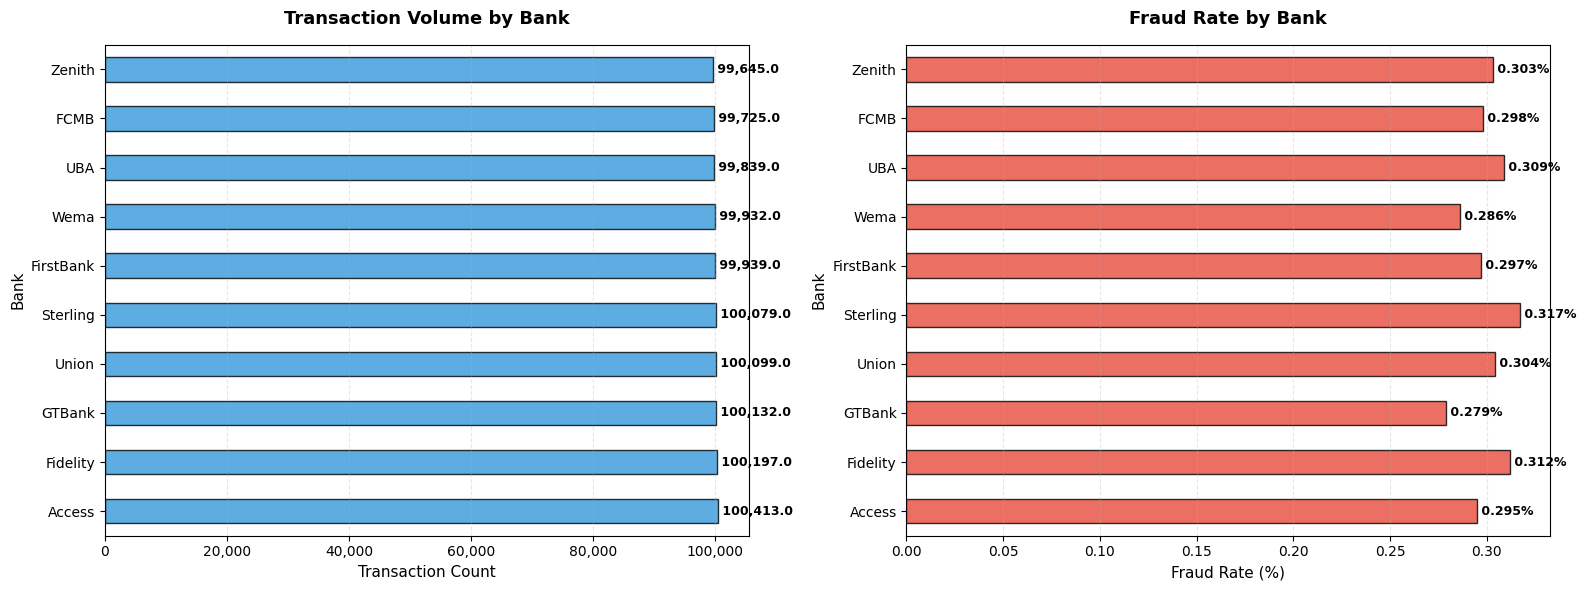


📊 STATISTICAL SUMMARY:
   • Fraud Rate Range: 0.279% - 0.317%
   • Fraud Rate Spread: 0.038%
   • Mean Fraud Rate: 0.300%
   • Std Dev: 0.012%

🎯 ENCODING RECOMMENDATION:
   • Number of banks: 10
   • Recommended: ONE-HOT ENCODING
   • Why: Low cardinality (10 categories), easy to interpret
   • Impact: Will add 10 new binary columns




In [7]:
# Bank Distribution Analysis
print("="*70)
print("🏦 BANK DISTRIBUTION ANALYSIS")
print("="*70)

# Use existing dataframe (already in memory - no need to reload CSV)
if 'bank' not in df.columns:
    print("⚠️  ERROR: 'bank' column not found in current dataframe!")
    print("   Available columns:", df.columns.tolist())
else:
    # Value counts with percentages
    bank_dist = df['bank'].value_counts()
    bank_pct = df['bank'].value_counts(normalize=True) * 100
    bank_fraud = df.groupby('bank')['is_fraud'].agg(['sum', 'mean'])

    # Combined table
    bank_summary = pd.DataFrame({
        'Count': bank_dist,
        'Percentage': bank_pct.round(2),
        'Fraud_Cases': bank_fraud['sum'].astype(int),
        'Fraud_Rate_%': (bank_fraud['mean'] * 100).round(3)
    }).sort_values('Count', ascending=False)

    print("\n" + bank_summary.to_string())
    print(f"\n{'='*70}")
    print(f"Total Unique Banks: {df['bank'].nunique()}")
    print(f"Most Common: {bank_dist.index[0]} ({bank_dist.iloc[0]:,} transactions, {bank_pct.iloc[0]:.1f}%)")
    print(f"Least Common: {bank_dist.index[-1]} ({bank_dist.iloc[-1]:,} transactions, {bank_pct.iloc[-1]:.1f}%)")
    print(f"{'='*70}\n")

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Bar plot: Transaction counts
    bank_summary['Count'].plot(kind='barh', ax=ax1, color='#3498db', alpha=0.8, edgecolor='black')
    ax1.set_title('Transaction Volume by Bank', fontsize=13, fontweight='bold', pad=15)
    ax1.set_xlabel('Transaction Count', fontsize=11)
    ax1.set_ylabel('Bank', fontsize=11)
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    ax1.grid(axis='x', alpha=0.3, linestyle='--')

    # Add value labels
    for i, (idx, row) in enumerate(bank_summary.iterrows()):
        ax1.text(row['Count'], i, f" {row['Count']:,}", va='center', fontsize=9, fontweight='bold')

    # Bar plot: Fraud rates
    bank_summary['Fraud_Rate_%'].plot(kind='barh', ax=ax2, color='#e74c3c', alpha=0.8, edgecolor='black')
    ax2.set_title('Fraud Rate by Bank', fontsize=13, fontweight='bold', pad=15)
    ax2.set_xlabel('Fraud Rate (%)', fontsize=11)
    ax2.set_ylabel('Bank', fontsize=11)
    ax2.grid(axis='x', alpha=0.3, linestyle='--')

    # Add value labels
    for i, (idx, row) in enumerate(bank_summary.iterrows()):
        ax2.text(row['Fraud_Rate_%'], i, f" {row['Fraud_Rate_%']:.3f}%", va='center', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Statistical summary
    print("\n📊 STATISTICAL SUMMARY:")
    print(f"   • Fraud Rate Range: {bank_summary['Fraud_Rate_%'].min():.3f}% - {bank_summary['Fraud_Rate_%'].max():.3f}%")
    print(f"   • Fraud Rate Spread: {bank_summary['Fraud_Rate_%'].max() - bank_summary['Fraud_Rate_%'].min():.3f}%")
    print(f"   • Mean Fraud Rate: {bank_summary['Fraud_Rate_%'].mean():.3f}%")
    print(f"   • Std Dev: {bank_summary['Fraud_Rate_%'].std():.3f}%")

    # Encoding recommendation
    print("\n🎯 ENCODING RECOMMENDATION:")
    print(f"   • Number of banks: {df['bank'].nunique()}")
    if df['bank'].nunique() <= 10:
        print(f"   • Recommended: ONE-HOT ENCODING")
        print(f"   • Why: Low cardinality ({df['bank'].nunique()} categories), easy to interpret")
        print(f"   • Impact: Will add {df['bank'].nunique()} new binary columns")
    elif df['bank'].nunique() <= 20:
        print(f"   • Recommended: ONE-HOT ENCODING (acceptable)")
        print(f"   • Alternative: TARGET ENCODING (fraud rate per bank)")
        print(f"   • Why: Moderate cardinality ({df['bank'].nunique()} categories)")
    else:
        print(f"   • Recommended: TARGET ENCODING or FREQUENCY ENCODING")
        print(f"   • Why: High cardinality ({df['bank'].nunique()} categories)")
        print(f"   • One-hot would create {df['bank'].nunique()} features - too many!")

    print(f"\n{'='*70}\n")

In [8]:
# One-Hot Encoding for Bank (Memory-Efficient)
print("="*70)
print("🔄 ONE-HOT ENCODING: BANK COLUMN")
print("="*70)

# Store original shape
original_shape = df.shape
print(f"\n📊 BEFORE Encoding:")
print(f"   • Shape: {original_shape}")
print(f"   • Bank values: {sorted(df['bank'].unique().tolist())}")

# Create one-hot encoded columns with BINARY integers (0, 1) - more memory efficient
print(f"\n⏳ Encoding in progress (memory-efficient method)...")
bank_encoded = pd.get_dummies(df['bank'], prefix='bank', drop_first=False, dtype='int8')  # int8 uses less memory

print(f"\n🎯 ENCODED Columns Created:")
for i, col in enumerate(bank_encoded.columns, 1):
    print(f"   {i}. {col}")

# Drop original bank column FIRST to free memory
print(f"\n💾 Freeing memory by dropping original column...")
df = df.drop('bank', axis=1)

# Now add encoded columns in-place (more memory efficient)
print(f"⏳ Adding encoded columns...")
for col in bank_encoded.columns:
    df[col] = bank_encoded[col]

# Clean up
del bank_encoded  # Free memory
import gc
gc.collect()  # Force garbage collection

print(f"\n✅ AFTER Encoding:")
print(f"   • Shape: {df.shape}")
print(f"   • New features added: {df.shape[1] - original_shape[1] + 1}")
print(f"   • Original 'bank' column: REMOVED")
print(f"   • Data type: int8 (0 or 1) - memory optimized")

print(f"\n📋 Sample of encoded data (first 5 rows):")
bank_cols = [col for col in df.columns if col.startswith('bank_')]
print(df[bank_cols].head(5).to_string())

print(f"\n🔍 Verification - Value counts for first encoded column:")
print(df[bank_cols[0]].value_counts().to_string())

print(f"\n{'='*70}")
print(f"✅ Encoding Complete!")
print(f"   • Final shape: {df.shape}")
print(f"   • Memory optimized: Using int8 instead of int64")
print(f"{'='*70}\n")

🔄 ONE-HOT ENCODING: BANK COLUMN

📊 BEFORE Encoding:
   • Shape: (1000000, 32)
   • Bank values: ['Access', 'FCMB', 'Fidelity', 'FirstBank', 'GTBank', 'Sterling', 'UBA', 'Union', 'Wema', 'Zenith']

⏳ Encoding in progress (memory-efficient method)...

🎯 ENCODED Columns Created:
   1. bank_Access
   2. bank_FCMB
   3. bank_Fidelity
   4. bank_FirstBank
   5. bank_GTBank
   6. bank_Sterling
   7. bank_UBA
   8. bank_Union
   9. bank_Wema
   10. bank_Zenith

💾 Freeing memory by dropping original column...
⏳ Adding encoded columns...

✅ AFTER Encoding:
   • Shape: (1000000, 41)
   • New features added: 10
   • Original 'bank' column: REMOVED
   • Data type: int8 (0 or 1) - memory optimized

📋 Sample of encoded data (first 5 rows):
   bank_Access  bank_FCMB  bank_Fidelity  bank_FirstBank  bank_GTBank  bank_Sterling  bank_UBA  bank_Union  bank_Wema  bank_Zenith
0            0          0              0               0            0              1         0           0          0            0
1  

In [9]:
# Current Dataframe Status Check
print("="*70)
print("📊 CURRENT DATAFRAME STATUS")
print("="*70)

print(f"\n📐 Shape: {df.shape}")
print(f"   • Rows: {df.shape[0]:,}")
print(f"   • Columns: {df.shape[1]}")

print(f"\n📋 Data Types Summary:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   • {dtype}: {count} columns")

print(f"\n🔍 DETAILED COLUMN BREAKDOWN:\n")

# Group columns by data type
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df.select_dtypes(include=['object']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()

print(f"✅ NUMERIC COLUMNS ({len(numeric_cols)}):")
for col in numeric_cols:
    n_unique = df[col].nunique()
    print(f"   • {col:30s} | unique: {n_unique:8,} | type: {df[col].dtype}")

if object_cols:
    print(f"\n⚠️  OBJECT COLUMNS ({len(object_cols)}) - NEED ENCODING:")
    for col in object_cols:
        n_unique = df[col].nunique()
        sample_vals = df[col].unique()[:5].tolist()
        print(f"   • {col:30s} | unique: {n_unique:8,} | sample: {sample_vals}")

if bool_cols:
    print(f"\n⚠️  BOOLEAN COLUMNS ({len(bool_cols)}) - NEED CONVERSION TO INT:")
    for col in bool_cols:
        print(f"   • {col:30s} | type: {df[col].dtype}")

print(f"\n{'='*70}")
print(f"📝 SUMMARY:")
print(f"   • Total columns: {df.shape[1]}")
print(f"   • Numeric (ready): {len(numeric_cols)}")
print(f"   • Object (need encoding): {len(object_cols)}")
print(f"   • Boolean (need conversion): {len(bool_cols)}")
print(f"{'='*70}\n")

📊 CURRENT DATAFRAME STATUS

📐 Shape: (1000000, 41)
   • Rows: 1,000,000
   • Columns: 41

📋 Data Types Summary:
   • float64: 13 columns
   • int8: 10 columns
   • int64: 9 columns
   • object: 7 columns
   • bool: 2 columns

🔍 DETAILED COLUMN BREAKDOWN:

✅ NUMERIC COLUMNS (32):
   • amount                         | unique:  975,806 | type: float64
   • hour                           | unique:       24 | type: int64
   • day_of_week                    | unique:        7 | type: int64
   • month                          | unique:       12 | type: int64
   • tx_count_24h                   | unique:        6 | type: float64
   • amount_sum_24h                 | unique:  982,341 | type: float64
   • amount_mean_7d                 | unique:  995,825 | type: float64
   • amount_std_7d                  | unique:  847,403 | type: float64
   • tx_count_total                 | unique:       72 | type: int64
   • amount_mean_total              | unique:   10,000 | type: float64
   • amount_std_to

-  Drop Unnecessary Columns

In [10]:
print("="*70)
print("🗑️  DROPPING UNNECESSARY COLUMNS")
print("="*70)

# Store shape before dropping
shape_before = df.shape
print(f"\n📊 BEFORE Dropping:")
print(f"   • Shape: {shape_before}")

# Define columns to drop (organized by category)
columns_to_drop = [
    # Identifiers (3)
    'transaction_id', 'customer_id', 'timestamp',
    
    # Amount Features (7)
    'amount_sum_24h', 'amount_mean_7d', 'amount_std_7d', 
    'amount_mean_total', 'amount_std_total', 'amount_vs_mean_ratio', 'amount_log',
    
    # Temporal Features (2)
    'is_weekend', 'is_peak_hour',
    
    # Behavioral/Aggregated Features (7)
    'tx_count_24h', 'tx_count_total', 'channel_diversity', 'location_diversity',
    'online_channel_ratio', 'velocity_score', 'velocity_bin',
    
    # Encoded/Categorical Features (2)
    'channel_encoded', 'merchant_category',
    
    # Location/Demographics (2)
    'location', 'age_group'
]

# Check which columns actually exist in the dataframe
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]
missing_cols = [col for col in columns_to_drop if col not in df.columns]

print(f"\n🎯 Columns to Drop ({len(existing_cols_to_drop)} found):")
for i, col in enumerate(existing_cols_to_drop, 1):
    print(f"   {i:2d}. {col}")

if missing_cols:
    print(f"\n⚠️  Columns NOT FOUND (already removed): {len(missing_cols)}")
    for col in missing_cols:
        print(f"   • {col}")

# Drop the columns
print(f"\n⏳ Dropping {len(existing_cols_to_drop)} columns...")
df = df.drop(columns=existing_cols_to_drop)

# Show results
print(f"\n✅ AFTER Dropping:")
print(f"   • Shape: {df.shape}")
print(f"   • Columns removed: {shape_before[1] - df.shape[1]}")
print(f"   • Columns remaining: {df.shape[1]}")

print(f"\n📋 Remaining Columns ({df.shape[1]}):")
for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    n_unique = df[col].nunique()
    print(f"   {i:2d}. {col:30s} | type: {dtype} | unique: {n_unique:,}")

print(f"\n{'='*70}")
print(f"✅ Cleanup Complete!")
print(f"   • Kept: {df.shape[1]} columns")
print(f"   • Ready for model training")
print(f"{'='*70}\n")

🗑️  DROPPING UNNECESSARY COLUMNS

📊 BEFORE Dropping:
   • Shape: (1000000, 41)

🎯 Columns to Drop (23 found):
    1. transaction_id
    2. customer_id
    3. timestamp
    4. amount_sum_24h
    5. amount_mean_7d
    6. amount_std_7d
    7. amount_mean_total
    8. amount_std_total
    9. amount_vs_mean_ratio
   10. amount_log
   11. is_weekend
   12. is_peak_hour
   13. tx_count_24h
   14. tx_count_total
   15. channel_diversity
   16. location_diversity
   17. online_channel_ratio
   18. velocity_score
   19. velocity_bin
   20. channel_encoded
   21. merchant_category
   22. location
   23. age_group

⏳ Dropping 23 columns...

✅ AFTER Dropping:
   • Shape: (1000000, 18)
   • Columns removed: 23
   • Columns remaining: 18

📋 Remaining Columns (18):
    1. amount                         | type: float64 | unique: 975,806
    2. hour                           | type: int64 | unique: 24
    3. day_of_week                    | type: int64 | unique: 7
    4. month                          |

- Modeling 1 Logistic Regression

In [12]:
data_model = df.copy()

In [13]:
X = data_model.drop('is_fraud', axis=1)  # All columns except is_fraud
y = data_model['is_fraud']  # Only is_fraud column

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Create and train logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [20]:

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
print("✅ Predictions made!")

✅ Predictions made!


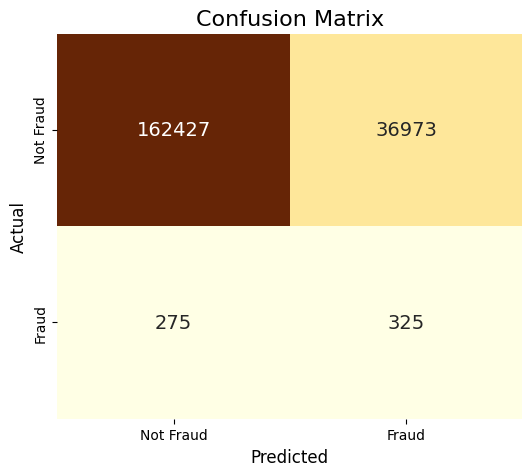

In [21]:
 
cm = confusion_matrix(y_test, y_pred)


labels = ["Not Fraud", "Fraud"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', cbar=False,
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 14})

# Title and axis labels
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

In [22]:
print("📊 CLASSIFICATION REPORT:")
report = classification_report(
    y_test,
    y_pred,
    target_names=['Not Fraud', 'Fraud'],
    digits=2,
    output_dict=False
)
print(report)

📊 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.81      0.90    199400
       Fraud       0.01      0.54      0.02       600

    accuracy                           0.81    200000
   macro avg       0.50      0.68      0.46    200000
weighted avg       1.00      0.81      0.89    200000



In [26]:
# Model Performance Summary
print("="*70)
print("📋 COMPREHENSIVE MODEL PERFORMANCE SUMMARY")
print("="*70)

# Current performance (default 0.5 threshold)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
tn_def = ((y_test == 0) & (y_pred_default == 0)).sum()
fp_def = ((y_test == 0) & (y_pred_default == 1)).sum()
fn_def = ((y_test == 1) & (y_pred_default == 0)).sum()
tp_def = ((y_test == 1) & (y_pred_default == 1)).sum()

print("\n🎯 MODEL CONFIGURATION:")
print(f"   • Algorithm: Logistic Regression")
print(f"   • Class Weight: balanced")
print(f"   • Max Iterations: 1000")
print(f"   • Features: {X.shape[1]} (after preprocessing)")
print(f"   • Training Size: {len(X_train):,} samples")
print(f"   • Test Size: {len(X_test):,} samples")

print("\n📊 CLASS DISTRIBUTION:")
print(f"   • Test Set Fraud Rate: {(y_test == 1).sum() / len(y_test) * 100:.2f}%")
print(f"   • Legitimate: {(y_test == 0).sum():,} ({(y_test == 0).sum() / len(y_test) * 100:.2f}%)")
print(f"   • Fraud: {(y_test == 1).sum():,} ({(y_test == 1).sum() / len(y_test) * 100:.2f}%)")

print("\n🔍 PERFORMANCE METRICS (Threshold = 0.5):")
print(f"   • AUC-ROC: {roc_auc:.4f}")
print(f"   • Average Precision: {avg_precision:.4f}")
print(f"   • Accuracy: {(tn_def + tp_def) / len(y_test):.4f}")
print(f"   • Precision (Fraud): {tp_def / (tp_def + fp_def):.4f}" if (tp_def + fp_def) > 0 else "   • Precision (Fraud): 0.0000")
print(f"   • Recall (Fraud): {tp_def / (tp_def + fn_def):.4f}")
print(f"   • F1-Score (Fraud): {2 * tp_def / (2 * tp_def + fp_def + fn_def):.4f}" if (2 * tp_def + fp_def + fn_def) > 0 else "   • F1-Score (Fraud): 0.0000")

print("\n📈 CONFUSION MATRIX (Threshold = 0.5):")
print(f"   • True Negatives (TN): {tn_def:,}")
print(f"   • False Positives (FP): {fp_def:,} ⚠️")
print(f"   • False Negatives (FN): {fn_def:,} 🚨")
print(f"   • True Positives (TP): {tp_def:,}")

print("\n💡 KEY INSIGHTS:")
print(f"   • Model catches {tp_def / (tp_def + fn_def) * 100:.1f}% of fraud cases")
print(f"   • {fp_def:,} legitimate transactions incorrectly flagged")
print(f"   • {fn_def:,} fraud cases missed (most critical)")
print(f"   • Precision of {tp_def / (tp_def + fp_def) * 100:.2f}% means {100 - tp_def / (tp_def + fp_def) * 100:.1f}% of alerts are false")

print("\n🎯 RECOMMENDATIONS:")
if fp_def > fn_def * 10:
    print("   • High false positive rate - consider increasing threshold")
    print("   • Current threshold (0.5) may be too aggressive")
    print("   • Review threshold optimization results above")
elif fn_def > tp_def:
    print("   • Missing more fraud than catching - consider decreasing threshold")
    print("   • May need more features or different model")
else:
    print("   • Review optimal threshold from analysis above")
    print("   • Consider business cost of false positives vs false negatives")

print(f"\n{'='*70}\n")

📋 COMPREHENSIVE MODEL PERFORMANCE SUMMARY

🎯 MODEL CONFIGURATION:
   • Algorithm: Logistic Regression
   • Class Weight: balanced
   • Max Iterations: 1000
   • Features: 17 (after preprocessing)
   • Training Size: 800,000 samples
   • Test Size: 200,000 samples

📊 CLASS DISTRIBUTION:
   • Test Set Fraud Rate: 0.30%
   • Legitimate: 199,400 (99.70%)
   • Fraud: 600 (0.30%)

🔍 PERFORMANCE METRICS (Threshold = 0.5):
   • AUC-ROC: 0.7020
   • Average Precision: 0.0199
   • Accuracy: 0.8138
   • Precision (Fraud): 0.0087
   • Recall (Fraud): 0.5417
   • F1-Score (Fraud): 0.0172

📈 CONFUSION MATRIX (Threshold = 0.5):
   • True Negatives (TN): 162,427
   • False Positives (FP): 36,973 ⚠️
   • False Negatives (FN): 275 🚨
   • True Positives (TP): 325

💡 KEY INSIGHTS:
   • Model catches 54.2% of fraud cases
   • 36,973 legitimate transactions incorrectly flagged
   • 275 fraud cases missed (most critical)
   • Precision of 0.87% means 99.1% of alerts are false

🎯 RECOMMENDATIONS:
   • High fa

📊 AUC-ROC SCORE

AUC-ROC: 0.7020
⚠️  Fair discrimination ability


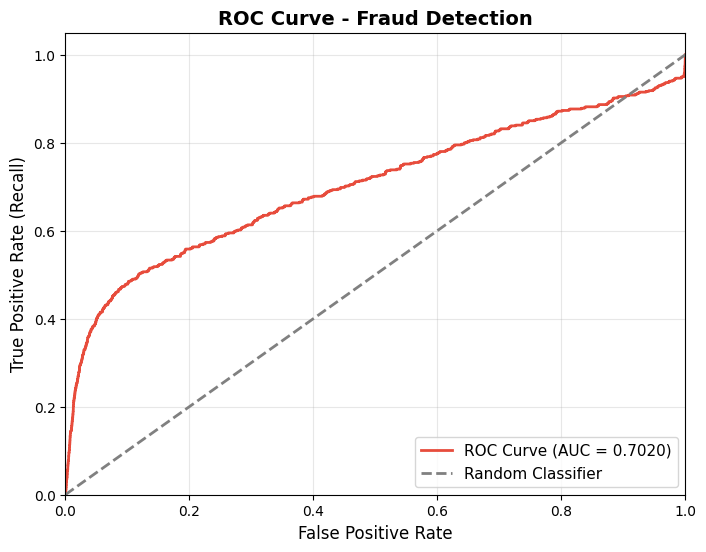

In [24]:
# AUC-ROC Score and ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("="*70)
print("📊 AUC-ROC SCORE")
print("="*70)
print(f"\nAUC-ROC: {roc_auc:.4f}")

# Interpretation
if roc_auc >= 0.9:
    print("✅ Excellent discrimination ability")
elif roc_auc >= 0.8:
    print("✅ Good discrimination ability")
elif roc_auc >= 0.7:
    print("⚠️  Fair discrimination ability")
else:
    print("❌ Poor discrimination ability")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#e74c3c', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve - Fraud Detection', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.show()

print(f"\n{'='*70}\n")

- Modeling 2 Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

print("="*70)
print("🌲 TRAINING RANDOM FOREST MODEL")
print("="*70)

# Initialize Random Forest
# Tree-based models are robust to feature scaling, so we use X_train directly
rf_model = RandomForestClassifier(
    n_estimators=100,           # Number of trees
    max_depth=10,               # Maximum depth to prevent overfitting
    min_samples_split=100,      # Minimum samples to split a node
    min_samples_leaf=50,        # Minimum samples per leaf
    class_weight='balanced',    # Crucial for imbalanced fraud datasets
    random_state=42,
    n_jobs=-1,                  # Parallel processing
    verbose=0 
)

print("\n🎯 Model Configuration:")
print(f"   • Algorithm: Random Forest")
print(f"   • Class Weight: balanced")

print("\n⏳ Training model...")
rf_model.fit(X_train, y_train)

print("\n✅ Random Forest model trained successfully!")

🌲 TRAINING RANDOM FOREST MODEL

🎯 Model Configuration:
   • Algorithm: Random Forest
   • Class Weight: balanced

⏳ Training model...

✅ Random Forest model trained successfully!


- Generating Predictions

In [37]:
# Generate predictions and probabilities
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("✅ Random Forest predictions generated!")

✅ Random Forest predictions generated!


- Random Forest Evaluation (Report & Confusion Matrix)

📊 RANDOM FOREST PERFORMANCE ANALYSIS

📝 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   Not Fraud     0.9986    0.7989    0.8877    199400
       Fraud     0.0095    0.6400    0.0187       600

    accuracy                         0.7984    200000
   macro avg     0.5041    0.7195    0.4532    200000
weighted avg     0.9957    0.7984    0.8851    200000



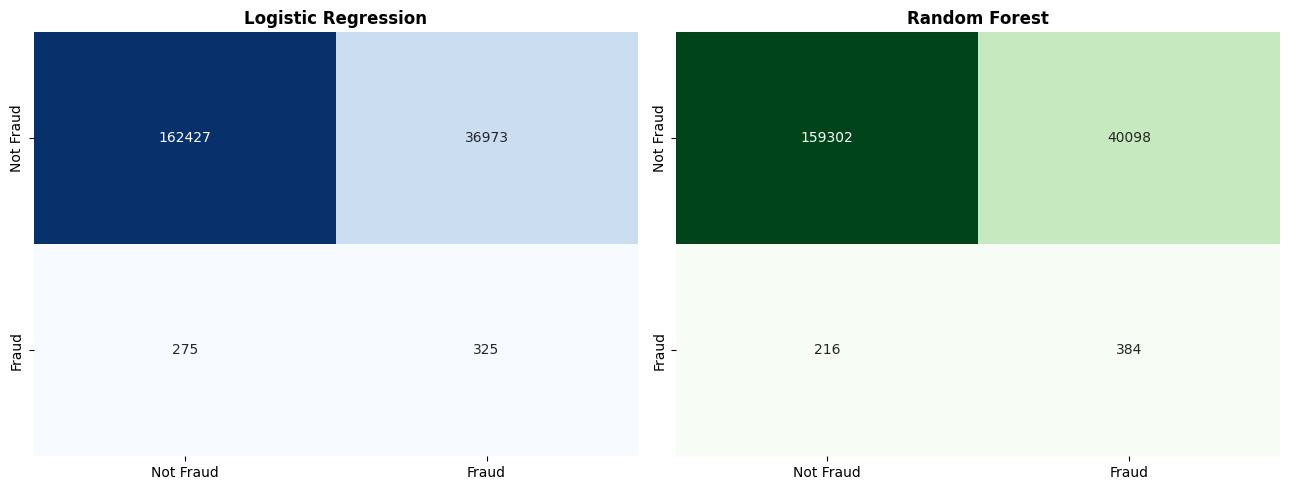


🟢 RANDOM FOREST STATS:
   • True Negatives (TN): 159,302
   • False Positives (FP): 40,098
   • False Negatives (FN): 216
   • True Positives (TP): 384


In [38]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

print("="*70)
print("📊 RANDOM FOREST PERFORMANCE ANALYSIS")
print("="*70)

# 1. Classification Report
print("\n📝 CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_rf, target_names=['Not Fraud', 'Fraud'], digits=4))

# 2. Confusion Matrix Comparison
cm_rf = confusion_matrix(y_test, y_pred_rf)
labels = ['Not Fraud', 'Fraud']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Logistic Regression (Assumes 'cm' exists from previous model)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels, ax=ax1)
ax1.set_title("Logistic Regression", fontweight='bold')

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=labels, yticklabels=labels, ax=ax2)
ax2.set_title("Random Forest", fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🟢 RANDOM FOREST STATS:")
print(f"   • True Negatives (TN): {cm_rf[0,0]:,}")
print(f"   • False Positives (FP): {cm_rf[0,1]:,}")
print(f"   • False Negatives (FN): {cm_rf[1,0]:,}")
print(f"   • True Positives (TP): {cm_rf[1,1]:,}")

- Comprehensive Model Comparison

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate metrics for both
lr_metrics = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), 
              recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc]

rf_metrics = [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf), 
              recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_proba_rf)]

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Logistic Regression': lr_metrics,
    'Random Forest': rf_metrics
})
comparison['Difference'] = comparison['Random Forest'] - comparison['Logistic Regression']

print("🏆 COMPREHENSIVE MODEL COMPARISON")
print(comparison.to_string(index=False))

# Winner Logic
rf_wins = sum(comparison['Difference'] > 0)
print(f"\n🎯 OVERALL WINNER: {'🟢 RANDOM FOREST' if rf_wins > 2 else '🔵 LOGISTIC REGRESSION'}")

🏆 COMPREHENSIVE MODEL COMPARISON
   Metric  Logistic Regression  Random Forest  Difference
 Accuracy             0.813760       0.798430   -0.015330
Precision             0.008714       0.009486    0.000772
   Recall             0.541667       0.640000    0.098333
 F1-Score             0.017151       0.018694    0.001543
  AUC-ROC             0.702018       0.822330    0.120312

🎯 OVERALL WINNER: 🟢 RANDOM FOREST


- ROC Curve Comparison

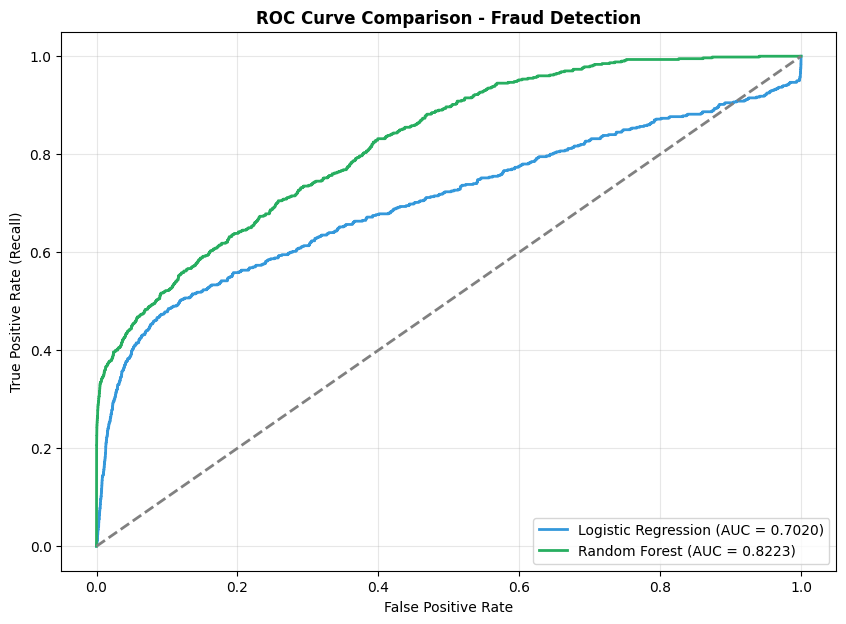

In [40]:
# Random Forest ROC stats
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='#3498db', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot(fpr_rf, tpr_rf, color='#27ae60', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison - Fraud Detection', fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

- Feature Importance

C:\Users\USER\AppData\Local\Temp\ipykernel_19644\819597653.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_15, palette='Greens_r')


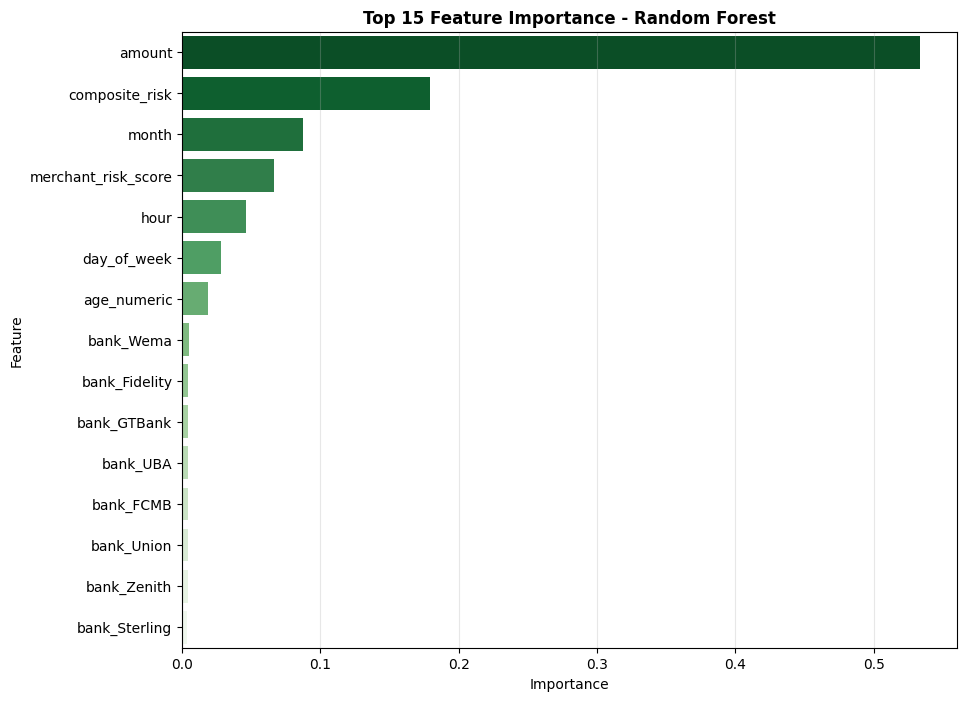

In [41]:
# Extract feature importance
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualize Top 15
plt.figure(figsize=(10, 8))
top_15 = rf_importance.head(15)
sns.barplot(x='Importance', y='Feature', data=top_15, palette='Greens_r')
plt.title('Top 15 Feature Importance - Random Forest', fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.show()